In [20]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Cargar el conjunto de datos
housing = fetch_california_housing()
# Crear conjuntos de datos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('X_valid',X_valid.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('y_valid',y_valid.shape)

X_train (11610, 8)
X_test (5160, 8)
X_valid (3870, 8)
y_train (11610,)
y_test (5160,)
y_valid (3870,)


In [22]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [23]:
# Crear el modelo de NN:
model = keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),keras.layers.Dense(1)])

c:\Users\jose.velasco\Documents\Cursos\TalentoTech IA\Script\TalentoTech-IAInnovador\venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compilar el modelo:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

In [25]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4502 - mean_absolute_percentage_error: 43.3791 - root_mean_squared_error: 1.1570 - val_loss: 0.4734 - val_mean_absolute_percentage_error: 28.2105 - val_root_mean_squared_error: 0.6881
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 2.1111 - mean_absolute_percentage_error: 36.6087 - root_mean_squared_error: 1.3861 - val_loss: 0.5982 - val_mean_absolute_percentage_error: 28.2094 - val_root_mean_squared_error: 0.7733
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.4844 - mean_absolute_percentage_error: 26.3585 - root_mean_squared_error: 0.6957 - val_loss: 0.4328 - val_mean_absolute_percentage_error: 26.4334 - val_root_mean_squared_error: 0.6579
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.3993 - mean_absolute_percentage_error: 25.0921 - root_mean_squared_error: 0.6319 - val_loss: 0.4204 - val_mean_absolute_percentage_error: 26.0491 - val_root_mean_squared_error: 0.6484
Epoch 5/10
363/363 ━━

<Axes: >

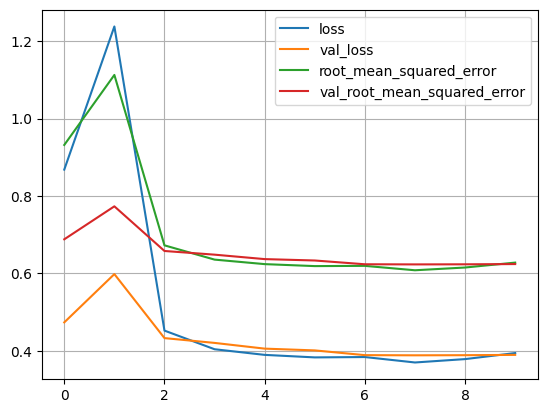

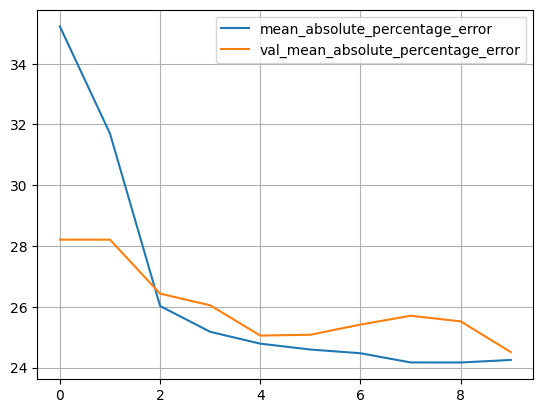

In [26]:
# Graficar el historial de entrenamiento:
dfHistory= pd.DataFrame(history.history)
dfHistory[['loss','val_loss','root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot(grid=True)                                                                                

In [27]:
#Evaluar el modelo con el conjunto de entrenamiento
loss,RMSE,MAPE=model.evaluate(X_train, y_train)
print("Evaluar el modelo con el conjunto de entrenamiento")
print("loss train: ", loss)
print("root_mean_squared_error train: ",RMSE)
print("mean_absolute_percentage_error train: ",MAPE)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.3486 - mean_absolute_percentage_error: 23.1087 - root_mean_squared_error: 0.5902
Evaluar el modelo con el conjunto de entrenamiento
loss train:  0.36465924978256226
root_mean_squared_error train:  23.204925537109375
mean_absolute_percentage_error train:  0.6038936972618103


In [28]:
#Evaluar el modelo con el conjunto de validación
loss,RMSE,MAPE=model.evaluate(X_valid, y_valid)
print("Evaluar el modelo con el conjunto de validacón")
print("loss valid: ", loss)
print("root_mean_squared_error valid: ",RMSE)
print("mean_absolute_percentage_error valid: ",MAPE)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.3714 - mean_absolute_percentage_error: 24.4917 - root_mean_squared_error: 0.6090
Evaluar el modelo con el conjunto de validacón
loss valid:  0.38944196701049805
root_mean_squared_error valid:  24.509563446044922
mean_absolute_percentage_error valid:  0.624136745929718


In [29]:
#Evaluar el modelo con el conjunto de prueba
loss,RMSE,MAPE=model.evaluate(X_train, y_train)
print("Evaluar el modelo con el conjunto de prueba")
print("loss prueba: ", loss)
print("root_mean_squared_error prueba: ",RMSE)
print("mean_absolute_percentage_error prueba: ",MAPE)

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.3486 - mean_absolute_percentage_error: 23.1087 - root_mean_squared_error: 0.5902
Evaluar el modelo con el conjunto de prueba
loss prueba:  0.36465924978256226
root_mean_squared_error prueba:  23.204925537109375
mean_absolute_percentage_error prueba:  0.6038936972618103
